# Data Science Mathematics
# Social Network Analysis
# In-Class Activity

Refer to the handout for a description of this activity.

You will analyze the two ego graphs provided.  One is a known Russian bot, and the other is unknown.  Based on graph resonance, determine if the unknown graph is likely to be a military person.  You will also calculate the clustering coefficients for each graph, and enumerate the communities.

First, import the relevant libraries.

#1 a) Resonance quantifies similarity between graphs
b) Network Centralities: calculated in code
   Clustering Coefficients: Known Bot Clustering Coefficient: 0.20371874907173476
                            Unknown 1 Clustering Coefficient: 0.07937480027928205
   Communities:  Known Bot Communities
                 240
                 143
                 75
                 46
                 39
                 
                 Unknown 1 Communities
                 303
                 75
                 43
                 38

c) The most likely assesment is that the unknown network is also a bot, given the high resonance between the known bot graph and the unknown graph. 

d) From what I know of Twitter, follower status is a sign of a connection for a human user (assumption being that a bot could be programmed to randomly follow any given twitter user). However, I would argue it isn't sufficient for this type of analysis in general. Following does not indicate level of engagement, which could be added to the graph via some sort of weighting metric. Also, directionality could indicate connection more realistically (i.e. an ego graph that shows all one directional connec

In [1]:
import networkx as nx
import pickle
import os
import math
import matplotlib.pyplot as plt
import numpy as np

The graph objects have been serialized.  Build a function to load them into memory using pickle.

In [12]:
#open pickle file
def open_pickle(pickle_path):
    with open(pickle_path, 'rb') as pickle_file:
        object_name = pickle.load(pickle_file)
    return object_name

You will have to calculate the resonance for all vertices in your ego graphs.  Define a function to calculate the betweenness centralities for all vertices.

In [3]:
#Get betweenness centrality
def spectrum(G):
    centrality = nx.betweenness_centrality(G)
    return centrality

Now, define a function for calculating graph resonance.

In [4]:
#Calculate graph resonance between graphs G1 and G2, with resonances S1 and S2, respectively
def resonate(G1, S1, G2, S2):
    res_divisor_1 = sum([a**2 for a in S1.values()])
    res_divisor_2 = sum([a**2 for a in S2.values()])
    res_divisor = math.sqrt(res_divisor_1*res_divisor_2)
    if res_divisor == 0:
        resonance = 0.0
    else:
        G1_nodes = G1.nodes()
        G2_nodes = G2.nodes()
        G_intersect = list(set(G1_nodes) & set(G2_nodes))
        if len(G_intersect) != 0:
            S1_list = [S1[node] for node in G_intersect]
            S1_array = np.array(S1_list)
            S2_list = [S2[node] for node in G_intersect]
            S2_array = np.array(S2_list)
            resonance_raw = np.dot(S1_array, S2_array)
            resonance = resonance_raw/res_divisor
        else:
            resonance = 0.0
    return resonance

It is important to know the clustering coefficients for each graph.  You should define a function for that.

In [5]:
#Calculate clustering coefficient for graph G
def clustering_coeff(G):
    c = nx.average_clustering(G)
    return c

You will also want to enumerate the communities in each graph.  Let's define a function to use the Clauset-Newman-Moore algorithm for community detection.

In [6]:
#Community detection
def get_communities(G):
    from networkx.algorithms.community import greedy_modularity_communities
    communities = list(greedy_modularity_communities(G))
    return communities

Now that you've defined all your functions, let's import the graphs.  Specify the absolute paths of your ego graphs.

In [14]:
#Note that you have to specify the absolute paths yourself for the graphs associated with this exercise
#Here is an example:
#r'C:\Directory1\Directory2\File_Name.pkl'

known_bot_path = r'known_bot2_Session7.pkl'
unknown_path_1 = r'Unknown_1_Session7.pkl'

Now let's load each graph.

In [15]:
known_bot = open_pickle(known_bot_path)
unknown_1 = open_pickle(unknown_path_1)

Let's explore our graphs a bit.  How many nodes (vertices) are in each one?  What does this mean?

In [29]:
print('Vertices in Known Bot: {}'.format(len(known_bot.nodes())))
print('Vertices in Unknown 1: {}'.format(len(unknown_1.nodes())))
print(known_bot.edges())


Vertices in Known Bot: 543
Vertices in Unknown 1: 459
[('qwertydfnf', '_Tomilina_'), ('bezenkova_777', 'Arsenteva_katy'), ('bezenkova_777', 'rusaliiinaaa'), ('TanuaKuklina', 'Arsenteva_katy'), ('KseniyaKoma2208', 'namedmeklass'), ('HAM_WaN_911', '_Tomilina_'), ('MrsBrennan0104', 'namedmeklass'), ('gurman_am', 'Arsenteva_katy'), ('gurman_am', '_Tomilina_'), ('v_malenda', '_svetlanaa'), ('v_malenda', 'rusaliiinaaa'), ('v_malenda', '_Tomilina_'), ('Dary_bay', 'Arsenteva_katy'), ('Dary_bay', '_Tomilina_'), ('Dary_bay', 'namedmeklass'), ('PShimanyuk', 'Arsenteva_katy'), ('AleksandraGaga5', 'Arsenteva_katy'), ('KazankovaULC', '_Tomilina_'), ('ilyasas13_37', '_Tomilina_'), ('ilyasas13_37', 'namedmeklass'), ('turnova_', 'dariaparfff'), ('turnova_', '_Tomilina_'), ('itsevdarix', 'rusaliiinaaa'), ('Yulay_Irk38', 'Arsenteva_katy'), ('Yulay_Irk38', '_Tomilina_'), ('gaElAHS5Q8BADAl', 'Arsenteva_katy'), ('GOOOOOOOOOODDES', '_Tomilina_'), ('Queen_Julay', 'Arsenteva_katy'), ('Queen_Julay', '_Tomilina_

Let's also plot slices of each graph.  But first, we need to induce subgraphs from each graph because there are probably too many vertices to make a good plot.

In [18]:
#Get slices (subsets) of each edge set.
known_bot_end = int(0.1*len(known_bot.edges()))
unknown_1_end = int(0.1*len(unknown_1.edges()))
known_bot_edges_slice = list(known_bot.edges())[0:known_bot_end]
unknown_1_edges_slice = list(unknown_1.edges())[0:unknown_1_end]

#Induce subgraphs
KB_sub = known_bot.edge_subgraph(known_bot_edges_slice)
U1_sub = unknown_1.edge_subgraph(unknown_1_edges_slice)

The known bot graph is quite large and will take a while to draw, so we will skip that one for now.

Let's plot the unknown 1 graph.

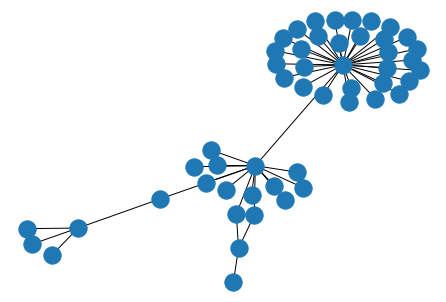

In [19]:
nx.draw(U1_sub)
plt.show()

Now plot the known bot graph in the line below:

<function matplotlib.pyplot.show(*args, **kw)>

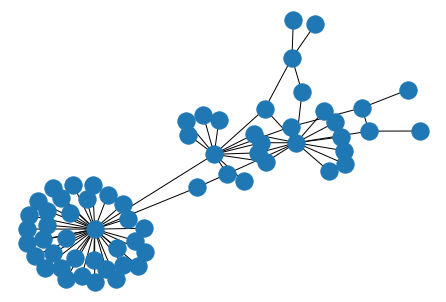

In [20]:
nx.draw(KB_sub)
plt.show

Now that you've loaded the graphs into memory, you need to calculate the centralities for each vertex in each graph.

In [21]:
known_bot_centralities = spectrum(known_bot)
unknown_1_centralities = spectrum(unknown_1)

Now calculate the clustering coefficients for each graph.

In [22]:
known_bot_cluster = clustering_coeff(known_bot)
unknown_1_cluster = clustering_coeff(unknown_1)

Let's analyze the clustering coefficients.  How similar are they?  What do they tell you about each graph?

In [31]:
print('Known Bot Clustering Coefficient: {}'.format(known_bot_cluster))
print('Unknown 1 Clustering Coefficient: {}'.format(unknown_1_cluster))


Known Bot Clustering Coefficient: 0.20371874907173476
Unknown 1 Clustering Coefficient: 0.07937480027928205


Now we need to calculate the resonance between the graphs.  We have already calculated the betweenness centralites for each, which is required for the resonance calculation.  What does the resonance tell us?

In [24]:
#Resonance between Known Bot and Unknown 1
K_1_res = resonate(known_bot, known_bot_centralities, unknown_1, unknown_1_centralities)

Now let's examine our resonance output.

In [25]:
print('Resonance between Known Bot and Unknown 1: {}'.format(K_1_res))

Resonance between Known Bot and Unknown 1: 0.9128869072090952


Now let's explore the communities in each graph.

In [26]:
Known_Bot_Communities = get_communities(known_bot)
Unknown_1_Communities = get_communities(unknown_1)

Now, let's examine our communities output.

In [27]:
print('Known Bot Communities')
for community in Known_Bot_Communities:
    print(len(community))
print('=====================')

print('Unknown 1 Communities')
for community in Unknown_1_Communities:
    print(len(community))

Known Bot Communities
240
143
75
46
39
Unknown 1 Communities
303
75
43
38


Use your output to answer the questions on the activity handout.

***Now save your output.  Go to File -> Print Preview and save your final output as a PDF.  Turn in to your Instructor, along with any additional sheets.